In [33]:
import lsst.daf.persistence as dafPersist
import re
import lsst.afw.math as afwMath
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [34]:
def get_mean( calexp):
    mi = calexp.getMaskedImage()
    bad = ~calexp.getMaskedImage().getMask().getPlaneBitMask(['DETECTED' ])
    sctrl = afwMath.StatisticsControl()
    sctrl.setAndMask(bad)
    stats = afwMath.makeStatistics(mi, afwMath.MEAN, sctrl)
    return (stats.getValue(afwMath.MEAN))

def get_threshold(dayDiff, factor=1):
    mi = dayDiff.getMaskedImage()
    bad = dayDiff.getMaskedImage().getMask().getPlaneBitMask(['BAD', 'SAT', 'EDGE', 'NO_DATA', ])
    sctrl = afwMath.StatisticsControl()
    sctrl.setAndMask(bad)
    stats = afwMath.makeStatistics(mi, afwMath.STDEVCLIP, sctrl)
    thres = (stats.getValue(afwMath.STDEVCLIP) * factor)
    return thres

def get_sn(img):
    try:
        sn= get_mean(img)/get_threshold(img)
    except Exception as e:
        sn = 0
    return sn

In [35]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Production/"
butler = dafPersist.Butler(DATADIR+"detect_prod") 

In [36]:
patches = []
patches_file=open(DATADIR+"/patches.txt", "rb")
for line in patches_file:
    line = line.replace('\n','')
    text = re.split("=| ",line)
    patches.append(text[-1])
patches_file.close()



In [37]:
dcoadd_dict = {}
for p in patches:
    if butler.datasetExists("deepCoadd", dataId={"filter":"z", "tract":0, "patch":p}):
            
            dCoadd = butler.get("deepCoadd", dataId={"filter":"z", "tract":0, "patch":p})
            dcoadd_dict[p]=dCoadd

In [38]:
butler_test = dafPersist.Butler(DATADIR+"daycoadd_tests_complete") 
dcoadd_dict_test = {}
for p in patches:
    if butler_test.datasetExists("deepCoadd", dataId={"filter":"z", "tract":0, "patch":p}):
            
            dCoadd = butler_test.get("deepCoadd", dataId={"filter":"z", "tract":0, "patch":p})
            dcoadd_dict_test[p]=dCoadd

In [39]:
len(dcoadd_dict), len(dcoadd_dict_test)

(391, 372)

In [40]:
sn_values = []
for p in patches:
    if dcoadd_dict.has_key(p):
        v1 = get_sn(dcoadd_dict[p])
    else:
        v1 = -1
    if dcoadd_dict_test.has_key(p):   
        v2 = get_sn(dcoadd_dict_test[p])
    else:
        v2 = -1
    if v1!=-1 and v2!=-1:
        sn_values.append([v1,v2])

In [41]:
sn_values = np.array(sn_values)

In [42]:
sn_values

array([[  8.07662745e-03,   5.38830834e-01],
       [  1.56173663e-02,   3.17051938e-01],
       [  1.54690300e-01,   9.59428957e-01],
       [  1.38850416e-02,   2.53404263e-01],
       [  8.68452194e-02,   3.30089744e-01],
       [  4.11512093e-02,   2.47320317e-01],
       [  4.28069063e-02,   1.58777399e-01],
       [  4.17648627e-02,   3.47255007e-01],
       [  8.02695017e-03,   2.09928461e-01],
       [  5.01700577e-01,   7.86124728e-01],
       [  4.11816658e-01,   2.02931512e-02],
       [  1.60216528e-02,   3.49044082e-03],
       [  2.04463948e-01,   2.63590547e-01],
       [  1.57550820e-01,   1.77355244e-01],
       [  5.66146448e-01,   5.19016680e-01],
       [  4.68766237e-01,   2.10685619e+00],
       [  2.04655103e-01,   2.33415987e-01],
       [  1.34522943e-01,   1.60114321e-01],
       [  3.96093289e-01,   3.52901469e-01],
       [  2.28162729e-01,   2.49818699e-01],
       [  4.08672152e-01,   2.49012913e-01],
       [  2.87481837e-01,   2.75292678e-01],
       [  

In [43]:
control = sn_values[:,0]
test = sn_values[:,1]

(0.0, 50)

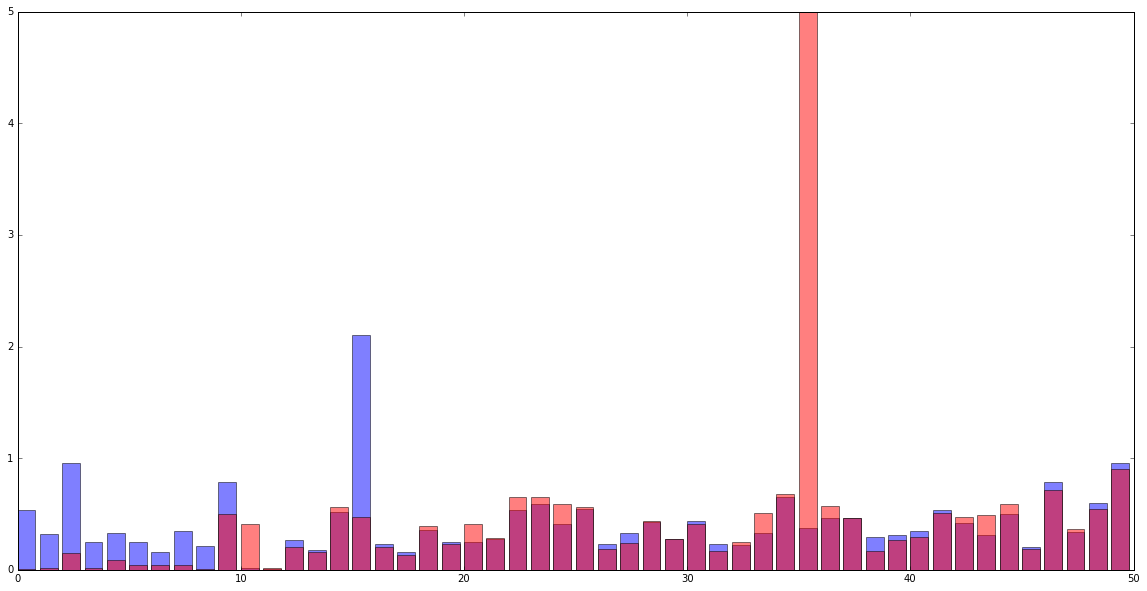

In [44]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmax=50)

(50, 100)

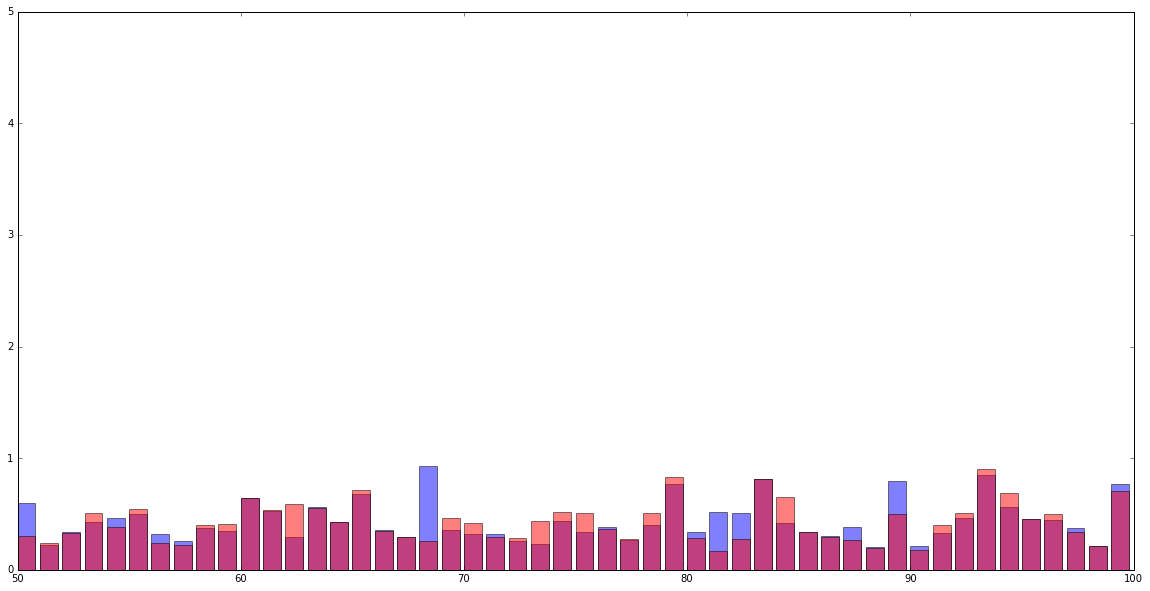

In [45]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmin=50, xmax=100)

(150, 200)

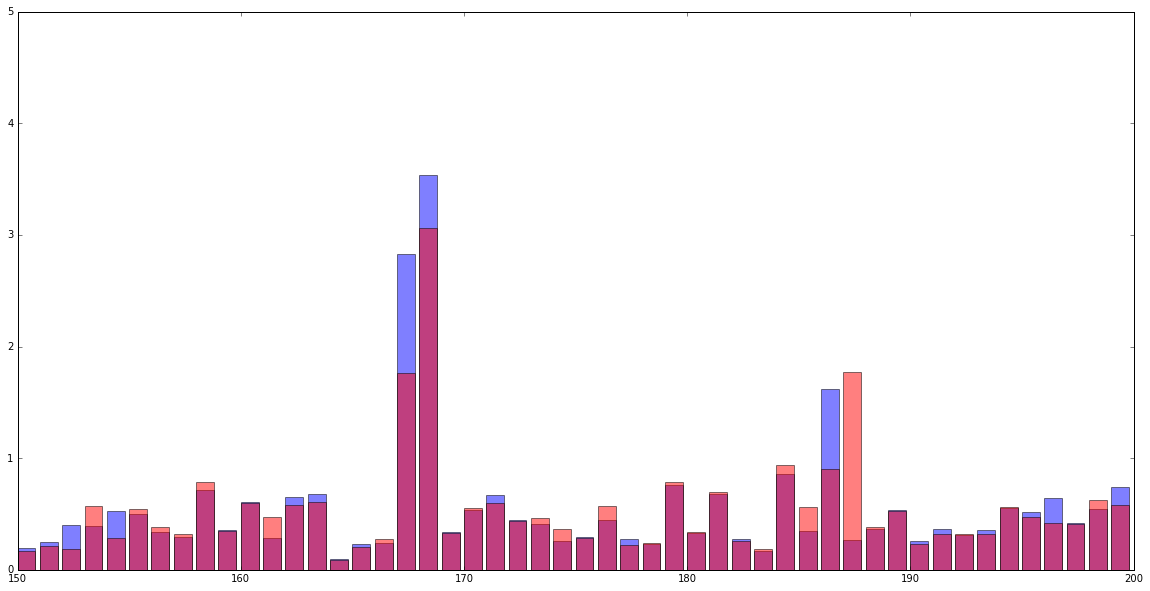

In [46]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmin=150, xmax=200)

(200, 250)

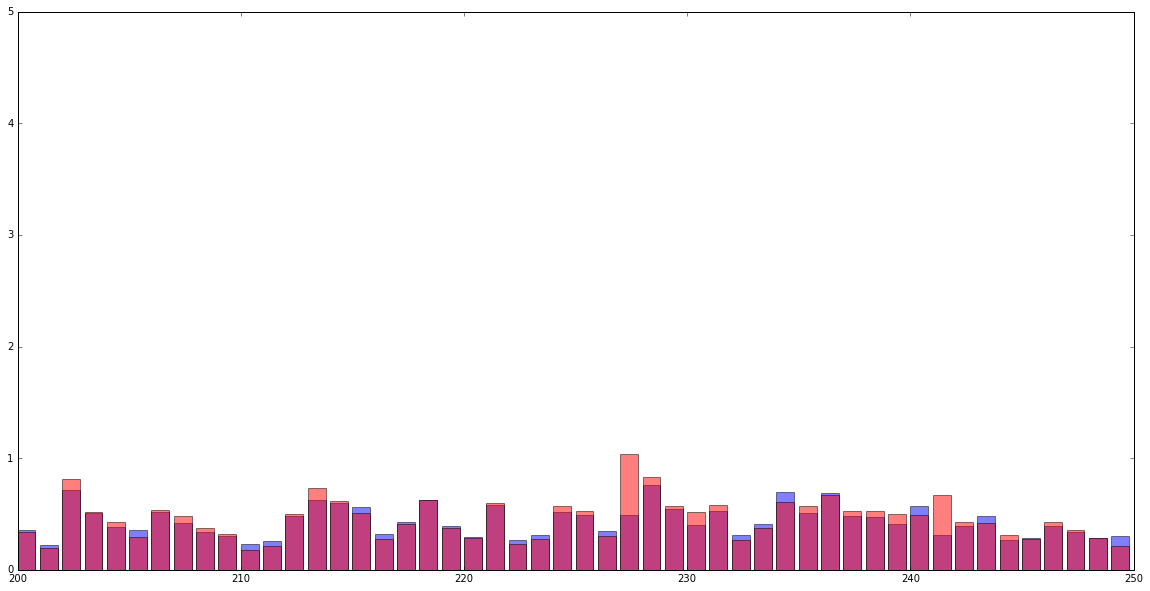

In [47]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmin=200, xmax=250)

(250, 300)

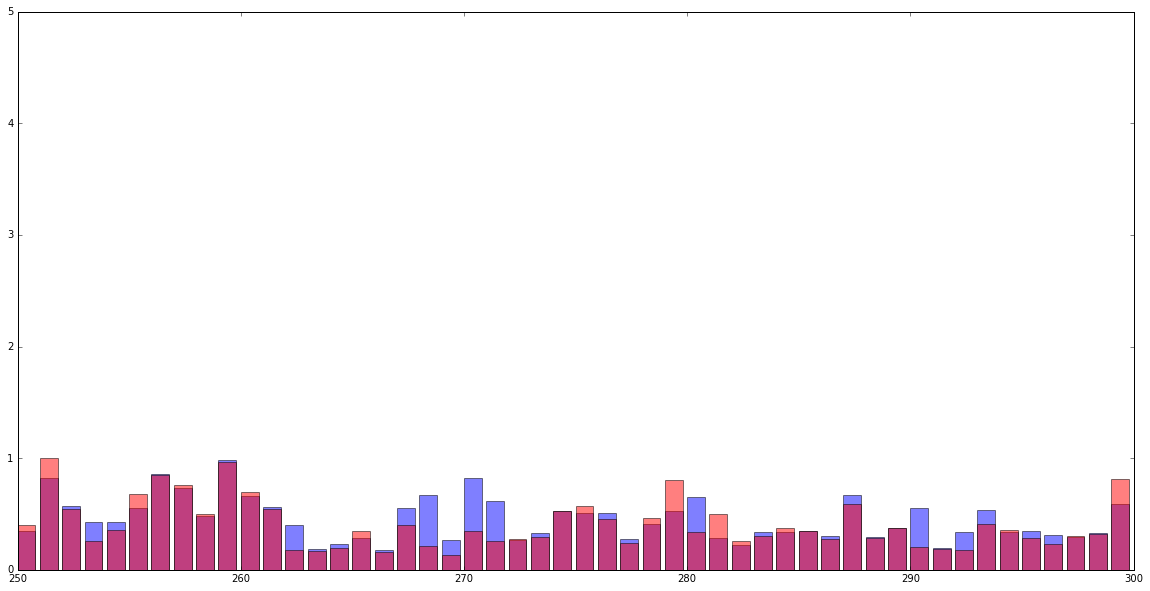

In [48]:
plt.figure(figsize=(20,10))
plt.bar(range(len(test)),test, color="blue", alpha=0.5)
plt.bar(range(len(control)),control, color="red", alpha=0.5)

plt.ylim(ymin=0.0, ymax=5.0)
plt.xlim(xmin=250, xmax=300)